# Settings

In [1]:
# For loading, manipulating and visualising data in tables
import pandas as pd
# For Operating System commands
import os
# For high-level file operations
import shutil
# For doing math
import numpy as np
# For making plots and graphical visualisations
import matplotlib.pyplot as plt
# For fancy (but slow) plotting
import seaborn as sns

from sklearn.metrics import mean_squared_error

import datetime

## User settings

In [2]:
# Local path to (capied) *.parquet files
strLocPath = 'data'
# Verbosity level
bVerbose = 1

bA20N_hack = False  # False: v0 "model"; True: median fuel_rate for A20N=A320neo is doubled for v1 "model"

bRank = False # True: apply model to ranking set; False: apply model to final set

# Read PRC data

## Read Fuel Burnt/Flown data into Pandas dataframe

In [3]:
# Training data
df_fuel_t = pd.read_parquet(os.path.join(strLocPath,'fuel_train.parquet'))
df_fuel_t['tset'] = True  # True = training data

if bVerbose > 0:
    print(df_fuel_t) 

           idx     flight_id                   start                     end  \
0            0  prc770822360 2025-04-13 02:31:04.447 2025-04-13 03:01:04.487   
1            1  prc770822360 2025-04-13 03:01:04.487 2025-04-13 03:16:04.226   
2            2  prc770822360 2025-04-13 03:16:04.458 2025-04-13 03:46:04.417   
3            3  prc770822360 2025-04-13 03:46:04.417 2025-04-13 04:01:04.540   
4            4  prc770822360 2025-04-13 04:01:04.540 2025-04-13 04:16:04.263   
...        ...           ...                     ...                     ...   
131525  131525  prc806606087 2025-09-01 01:25:56.491 2025-09-01 01:30:56.126   
131526  131526  prc806606087 2025-09-01 01:30:56.126 2025-09-01 01:36:10.788   
131527  131527  prc806606087 2025-09-01 01:36:10.788 2025-09-01 01:41:00.049   
131528  131528  prc806606087 2025-09-01 01:41:00.049 2025-09-01 01:45:55.863   
131529  131529  prc806606087 2025-09-01 01:45:55.863 2025-09-01 02:00:56.463   

          fuel_kg  tset  
0       2500.

In [4]:
# Submission data
if bRank:
    df_fuel_s = pd.read_parquet(os.path.join(strLocPath,'fuel_rank_submission.parquet'))
else:
    df_fuel_s = pd.read_parquet(os.path.join(strLocPath,'fuel_final_submission.parquet'))
    
df_fuel_s['tset'] = False  # False = submission data
df_fuel_s['fuel_kg'] = 0   # to have 0 instead of None

if bVerbose > 0:
    print(df_fuel_s) 

         idx     flight_id                   start                     end  \
0          0  prc806615763 2025-09-01 03:03:10.925 2025-09-01 03:07:51.584   
1          1  prc806615763 2025-09-01 03:07:51.584 2025-09-01 03:12:50.921   
2          2  prc806615763 2025-09-01 03:12:50.921 2025-09-01 03:17:51.404   
3          3  prc806615763 2025-09-01 03:17:51.404 2025-09-01 03:22:50.539   
4          4  prc806615763 2025-09-01 03:22:50.539 2025-09-01 03:27:50.727   
...      ...           ...                     ...                     ...   
61740  37451  prc821916593 2025-10-31 23:06:58.703 2025-10-31 23:17:08.526   
61741  37452  prc821916593 2025-10-31 23:17:08.526 2025-10-31 23:22:13.468   
61742  37453  prc821916593 2025-10-31 23:22:13.468 2025-10-31 23:27:18.458   
61743  37454  prc821916593 2025-10-31 23:27:18.458 2025-10-31 23:52:43.483   
61744  37455  prc821916593 2025-10-31 23:52:43.483 2025-10-31 23:57:49.145   

       fuel_kg   tset  
0            0  False  
1            0 

In [5]:
# Concat training and submission dataframes for commmon feature definition
df_fuel = pd.concat([df_fuel_t, df_fuel_s], ignore_index=True)

if bVerbose  > 0:
    print(df_fuel) 

          idx     flight_id                   start                     end  \
0           0  prc770822360 2025-04-13 02:31:04.447 2025-04-13 03:01:04.487   
1           1  prc770822360 2025-04-13 03:01:04.487 2025-04-13 03:16:04.226   
2           2  prc770822360 2025-04-13 03:16:04.458 2025-04-13 03:46:04.417   
3           3  prc770822360 2025-04-13 03:46:04.417 2025-04-13 04:01:04.540   
4           4  prc770822360 2025-04-13 04:01:04.540 2025-04-13 04:16:04.263   
...       ...           ...                     ...                     ...   
193270  37451  prc821916593 2025-10-31 23:06:58.703 2025-10-31 23:17:08.526   
193271  37452  prc821916593 2025-10-31 23:17:08.526 2025-10-31 23:22:13.468   
193272  37453  prc821916593 2025-10-31 23:22:13.468 2025-10-31 23:27:18.458   
193273  37454  prc821916593 2025-10-31 23:27:18.458 2025-10-31 23:52:43.483   
193274  37455  prc821916593 2025-10-31 23:52:43.483 2025-10-31 23:57:49.145   

        fuel_kg   tset  
0        2500.0   True  
1

## Read Flight list data into Pandas dataframe

In [6]:
df_flt_t = pd.read_parquet(os.path.join(strLocPath,'flightlist_train.parquet'))
df_flt_t['tset'] = True  # True = training data

if bVerbose > 0:
    print(df_flt_t) 

      flight_date aircraft_type             takeoff              landed  \
0      2025-04-12          B789 2025-04-12 16:15:35 2025-04-13 04:33:52   
1      2025-04-12          A359 2025-04-12 16:40:41 2025-04-13 03:10:15   
2      2025-04-12          A359 2025-04-12 17:01:38 2025-04-13 06:10:27   
3      2025-04-12          B789 2025-04-12 17:53:11 2025-04-13 05:05:13   
4      2025-04-12          B789 2025-04-12 18:05:27 2025-04-13 06:23:52   
...           ...           ...                 ...                 ...   
11032  2025-08-31          A20N 2025-08-31 21:22:33 2025-09-01 03:46:41   
11033  2025-08-31          A20N 2025-08-31 21:31:33 2025-09-01 02:42:11   
11034  2025-08-31          A20N 2025-08-31 22:10:44 2025-09-01 03:29:47   
11035  2025-08-31          A20N 2025-08-31 22:40:20 2025-09-01 04:24:43   
11036  2025-08-31          A20N 2025-08-31 23:29:32 2025-09-01 02:07:02   

      origin_icao                                        origin_name  \
0            WMKK          

In [7]:
if bRank:
    df_flt_s = pd.read_parquet(os.path.join(strLocPath,'flightlist_rank.parquet'))
else:
    df_flt_sr = pd.read_parquet(os.path.join(strLocPath,'flightlist_rank.parquet'))
    df_flt_sf = pd.read_parquet(os.path.join(strLocPath,'flightlist_final.parquet'))
    df_flt_s = pd.concat([df_flt_sr, df_flt_sf], ignore_index=True)
    
df_flt_s['tset'] = False  # False = submission data

if bVerbose > 0:
    print(df_flt_s) 

     flight_date aircraft_type             takeoff              landed  \
0     2025-09-01          A320 2025-09-01 00:46:27 2025-09-01 04:13:27   
1     2025-09-01          A20N 2025-09-01 00:40:28 2025-09-01 04:36:17   
2     2025-09-01          A320 2025-09-01 00:58:47 2025-09-01 04:44:01   
3     2025-09-01          A20N 2025-09-01 01:11:08 2025-09-01 07:19:51   
4     2025-09-01          A320 2025-09-01 01:13:38 2025-09-01 05:04:01   
...          ...           ...                 ...                 ...   
4719  2025-10-31          A20N 2025-10-31 20:57:23 2025-11-01 00:31:01   
4720  2025-10-31          A20N 2025-10-31 21:26:00 2025-11-01 03:39:56   
4721  2025-10-31          A320 2025-10-31 21:45:04 2025-11-01 02:01:56   
4722  2025-10-31          A320 2025-10-31 22:06:32 2025-11-01 03:02:30   
4723  2025-10-31          A20N 2025-10-31 22:22:25 2025-11-01 02:04:49   

     origin_icao                                        origin_name  \
0           MMGL                  Guadal

In [8]:
# Concat training and submission dataframes for commmon feature definition
df_flt = pd.concat([df_flt_t, df_flt_s], ignore_index=True)

if bVerbose  > 0:
    print(df_flt) 

      flight_date aircraft_type             takeoff              landed  \
0      2025-04-12          B789 2025-04-12 16:15:35 2025-04-13 04:33:52   
1      2025-04-12          A359 2025-04-12 16:40:41 2025-04-13 03:10:15   
2      2025-04-12          A359 2025-04-12 17:01:38 2025-04-13 06:10:27   
3      2025-04-12          B789 2025-04-12 17:53:11 2025-04-13 05:05:13   
4      2025-04-12          B789 2025-04-12 18:05:27 2025-04-13 06:23:52   
...           ...           ...                 ...                 ...   
15756  2025-10-31          A20N 2025-10-31 20:57:23 2025-11-01 00:31:01   
15757  2025-10-31          A20N 2025-10-31 21:26:00 2025-11-01 03:39:56   
15758  2025-10-31          A320 2025-10-31 21:45:04 2025-11-01 02:01:56   
15759  2025-10-31          A320 2025-10-31 22:06:32 2025-11-01 03:02:30   
15760  2025-10-31          A20N 2025-10-31 22:22:25 2025-11-01 02:04:49   

      origin_icao                                        origin_name  \
0            WMKK          

# Compute, join and explore data

## Compute features per interval: fuel burn rate 

In [9]:
# Compute the duration of each interval
df_fuel['interval'] = df_fuel['end'] - df_fuel['start']
# Get duration of each interval in minutes (calculated from seconds)
df_fuel['interval_min'] = df_fuel['interval'].dt.total_seconds() / 60

# Compute the fuel burn rate as kg/min for each interval
df_fuel['fuel_rate'] = df_fuel['fuel_kg'] / df_fuel['interval_min']

if bVerbose  > 0:
    df_fuel

## Join flight data onto fuel data

In [10]:
# Join flight data into fuel DataFrame object
df_fuel = df_fuel.join(df_flt.set_index('flight_id'), rsuffix='flt_', on='flight_id')

if bVerbose  > 0:
    df_fuel

## Fuel burn statistics per A/C type

### Box plot with Histogram

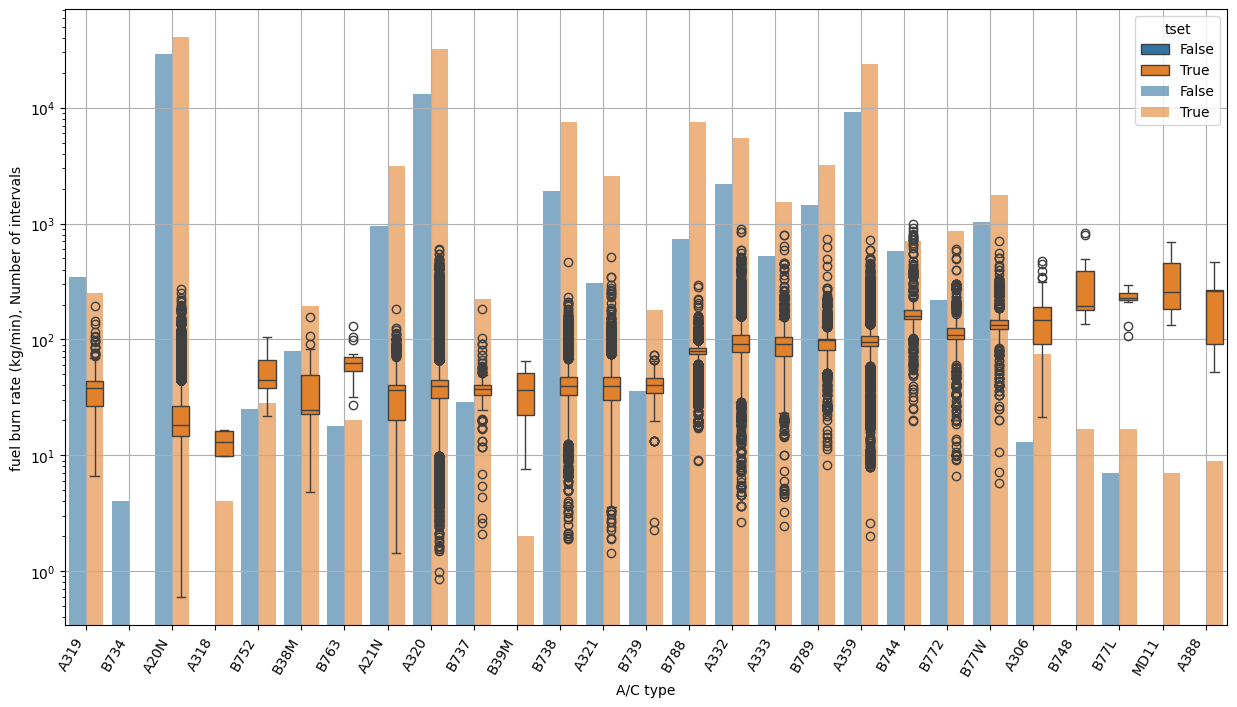

In [11]:
# Compute the median for each category
category_median = df_fuel.groupby('aircraft_type')['fuel_rate'].median().reset_index()

# Sort the categories by the median
category_median_sorted = category_median.sort_values(by='fuel_rate')

# Reorder the categories in the DataFrame based on the sorted median
df_fuel['aircraft_type'] = pd.Categorical(df_fuel['aircraft_type'],
                                categories=category_median_sorted['aircraft_type'],
                                ordered=True)

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=df_fuel, x='aircraft_type', y='fuel_rate', hue='tset')
ax1 = sns.countplot(x="aircraft_type", data=df_fuel, alpha=0.6, hue='tset')
plt.grid()
plt.xlabel("A/C type")
plt.ylabel("fuel burn rate (kg/min), Number of intervals")
plt.xticks(rotation=60, ha='right')
plt.yscale('log')
plt.show()

# Basic Model = Median of fuel_rate in training data

In [12]:
# Filter training data intervals
df = df_fuel[df_fuel['tset'] == True]
df

,idx,flight_id,start,end,fuel_kg,tset,interval,interval_min,fuel_rate,flight_date,aircraft_type,takeoff,landed,origin_icao,origin_name,destination_icao,destination_name,tsetflt_
0,0,prc770822360,2025-04-13 02:31:04.447,2025-04-13 03:01:04.487,2500.0000,True,0 days 00:30:00.040000,30.000667,83.331482,2025-04-12,B789,2025-04-12 16:15:35,2025-04-13 04:33:52,WMKK,Kuala Lumpur International Airport,EHAM,Amsterdam Schiphol Airport,True
1,1,prc770822360,2025-04-13 03:01:04.487,2025-04-13 03:16:04.226,1200.0000,True,0 days 00:14:59.739000,14.995650,80.023207,2025-04-12,B789,2025-04-12 16:15:35,2025-04-13 04:33:52,WMKK,Kuala Lumpur International Airport,EHAM,Amsterdam Schiphol Airport,True
2,2,prc770822360,2025-04-13 03:16:04.458,2025-04-13 03:46:04.417,2500.0000,True,0 days 00:29:59.959000,29.999317,83.335232,2025-04-12,B789,2025-04-12 16:15:35,2025-04-13 04:33:52,WMKK,Kuala Lumpur International Airport,EHAM,Amsterdam Schiphol Airport,True
3,3,prc770822360,2025-04-13 03:46:04.417,2025-04-13 04:01:04.540,1300.0000,True,0 days 00:15:00.123000,15.002050,86.654824,2025-04-12,B789,2025-04-12 16:15:35,2025-04-13 04:33:52,WMKK,Kuala Lumpur International Airport,EHAM,Amsterdam Schiphol Airport,True
4,4,prc770822360,2025-04-13 04:01:04.540,2025-04-13 04:16:04.263,600.0000,True,0 days 00:14:59.723000,14.995383,40.012315,2025-04-12,B789,2025-04-12 16:15:35,2025-04-13 04:33:52,WMKK,Kuala Lumpur International Airport,EHAM,Amsterdam Schiphol Airport,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131525,131525,prc806606087,2025-09-01 01:25:56.491,2025-09-01 01:30:56.126,45.3592,True,0 days 00:04:59.635000,4.993917,9.082891,2025-08-31,A20N,2025-08-31 23:29:32,2025-09-01 02:07:02,MMSD,San Jose del Cabo Los Cabos International Airport,KOAK,Oakland International Airport,True
131526,131526,prc806606087,2025-09-01 01:30:56.126,2025-09-01 01:36:10.788,90.7184,True,0 days 00:05:14.662000,5.244367,17.298257,2025-08-31,A20N,2025-08-31 23:29:32,2025-09-01 02:07:02,MMSD,San Jose del Cabo Los Cabos International Airport,KOAK,Oakland International Airport,True
131527,131527,prc806606087,2025-09-01 01:36:10.788,2025-09-01 01:41:00.049,45.3592,True,0 days 00:04:49.261000,4.821017,9.408638,2025-08-31,A20N,2025-08-31 23:29:32,2025-09-01 02:07:02,MMSD,San Jose del Cabo Los Cabos International Airport,KOAK,Oakland International Airport,True
131528,131528,prc806606087,2025-09-01 01:41:00.049,2025-09-01 01:45:55.863,90.7184,True,0 days 00:04:55.814000,4.930233,18.400427,2025-08-31,A20N,2025-08-31 23:29:32,2025-09-01 02:07:02,MMSD,San Jose del Cabo Los Cabos International Airport,KOAK,Oakland International Airport,True


In [13]:
df[["aircraft_type", "fuel_rate"]].groupby(["aircraft_type"], observed=True).describe().sort_values(('fuel_rate', 'count'), ascending=False)

fuel_rate                                                  \
                  count        mean         std         min         25%   
aircraft_type                                                             
A20N            40488.0   21.455971   13.919890    0.593675   14.704915   
A320            31980.0   45.073643   33.647676    0.862288   30.922271   
A359            23942.0   99.332114   28.239191    1.995567   87.540446   
B788             7469.0   76.581014   20.218023    9.000883   75.016644   
B738             7457.0   42.711043   21.198379    1.880175   33.300440   
A332             5441.0  104.565758   61.745287    2.641575   77.620944   
B789             3173.0   96.511585   32.601976    8.237816   80.618537   
A21N             3138.0   34.070858   14.780041    1.441414   20.020554   
A321             2572.0   43.328924   29.568025    1.421484   29.967213   
B77W             1762.0  141.580000   47.472535    5.784014  122.237762   
A333             1521.0   95.462316   59.155015    2.474176   71.327944   
B772              858.0  115.869055   59.176303    6.664423   99.945446   
B744              703.0  181.248923  112.334276   19.943574  148.982749   
A319              251.0   39.290040   22.660150    6.625726   26.457421   
B737              221.0   37.669233   16.823224    2.085401   33.330630   
B38M              195.0   34.502317   17.632808    4.853819   22.614583   
B739              180.0   41.266465   12.320408    2.244388   34.497430   
A306               75.0  153.497599   90.030015   21.218551   90.615811   
B752               28.0   53.451451   22.379575   21.980439   38.283462   
B763               20.0   65.412316   24.327071   27.291840   53.873641   
B748               17.0  319.063890  214.680823  134.439722  179.048129   
B77L               17.0  222.506757   45.065560  106.687530  217.019293   
A388                9.0  231.893327  133.859657   52.224325   91.398141   
MD11                7.0  337.107345  215.756359  133.876669  182.452543   
A318                4.0   13.020494    3.614049    9.894671    9.895031   
B39M                2.0   36.558992   40.855079    7.670089   22.114540   

                                                   
                      50%         75%         max  
aircraft_type                                      
A20N            18.099758   26.622274  270.909019  
A320            39.975748   44.953891  598.702524  
A359            95.849913  106.821915  717.641821  
B788            79.384571   84.354826  292.441379  
B738            39.926610   47.106363  464.874901  
A332            90.603334  110.005867  889.474551  
B789            98.230871  100.002036  735.028156  
A21N            36.660944   40.184514  184.100115  
A321            39.949264   47.566133  510.150963  
B77W           133.340394  146.812990  706.658291  
A333            90.903849  103.921664  799.599312  
B772           108.255755  126.624669  600.040003  
B744           160.182965  179.956061  989.472018  
A319            37.717080   43.700298  195.891264  
B737            36.957369   40.006268  184.082950  
B38M            24.384482   49.645038  155.127223  
B739            40.007979   46.695771   73.244545  
A306           146.897110  188.588655  474.127417  
B752            44.854679   66.145336  104.401432  
B763            62.032407   69.898255  131.523596  
B748           193.682574  390.768473  825.543414  
B77L           225.538473  251.035522  296.111075  
A388           263.651829  269.455394  467.576623  
MD11           254.679740  457.204001  691.881919  
A318            12.904976   16.030439   16.377353  
B39M            36.558992   51.003444   65.447896

In [14]:
# Group by 'aircraft_type' and compute the median of 'fuel_rate'
# .reset_index() converts the output back into a DataFrame
median_fuel_rate_df = df.groupby('aircraft_type', observed=True)['fuel_rate'].median().reset_index()

if not(bRank):
    # Hack to apply same fuel_rate to B734 as determined for B737
    median_fuel_rate_df.loc[len(median_fuel_rate_df)] = ['B734', median_fuel_rate_df[median_fuel_rate_df['aircraft_type'] == 'B737']['fuel_rate'].item()]

median_fuel_rate_df

,aircraft_type,fuel_rate
0,A319,37.717080
1,A20N,18.099758
2,A318,12.904976
3,B752,44.854679
4,B38M,24.384482
5,B763,62.032407
6,A21N,36.660944
7,A320,39.975748
8,B737,36.957369
9,B39M,36.558992


In [15]:
# Hack to change fuel_rate for A20N by factor 2 based on engineering judgement and comparison to A320 as well as A21N vs. A321
if bA20N_hack:
    median_fuel_rate_df.loc[median_fuel_rate_df['aircraft_type'] == 'A20N', 'fuel_rate'] *= 2
    median_fuel_rate_df

In [16]:
# Join estimated fuel_rate into the fuel DataFrame object
df_fuel = df_fuel.join(median_fuel_rate_df.set_index('aircraft_type'), rsuffix='_est', on='aircraft_type')
df_fuel

,idx,flight_id,start,end,fuel_kg,tset,interval,interval_min,fuel_rate,flight_date,aircraft_type,takeoff,landed,origin_icao,origin_name,destination_icao,destination_name,tsetflt_,fuel_rate_est
0,0,prc770822360,2025-04-13 02:31:04.447,2025-04-13 03:01:04.487,2500.0,True,0 days 00:30:00.040000,30.000667,83.331482,2025-04-12,B789,2025-04-12 16:15:35,2025-04-13 04:33:52,WMKK,Kuala Lumpur International Airport,EHAM,Amsterdam Schiphol Airport,True,98.230871
1,1,prc770822360,2025-04-13 03:01:04.487,2025-04-13 03:16:04.226,1200.0,True,0 days 00:14:59.739000,14.995650,80.023207,2025-04-12,B789,2025-04-12 16:15:35,2025-04-13 04:33:52,WMKK,Kuala Lumpur International Airport,EHAM,Amsterdam Schiphol Airport,True,98.230871
2,2,prc770822360,2025-04-13 03:16:04.458,2025-04-13 03:46:04.417,2500.0,True,0 days 00:29:59.959000,29.999317,83.335232,2025-04-12,B789,2025-04-12 16:15:35,2025-04-13 04:33:52,WMKK,Kuala Lumpur International Airport,EHAM,Amsterdam Schiphol Airport,True,98.230871
3,3,prc770822360,2025-04-13 03:46:04.417,2025-04-13 04:01:04.540,1300.0,True,0 days 00:15:00.123000,15.002050,86.654824,2025-04-12,B789,2025-04-12 16:15:35,2025-04-13 04:33:52,WMKK,Kuala Lumpur International Airport,EHAM,Amsterdam Schiphol Airport,True,98.230871
4,4,prc770822360,2025-04-13 04:01:04.540,2025-04-13 04:16:04.263,600.0,True,0 days 00:14:59.723000,14.995383,40.012315,2025-04-12,B789,2025-04-12 16:15:35,2025-04-13 04:33:52,WMKK,Kuala Lumpur International Airport,EHAM,Amsterdam Schiphol Airport,True,98.230871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193270,37451,prc821916593,2025-10-31 23:06:58.703,2025-10-31 23:17:08.526,0.0,False,0 days 00:10:09.823000,10.163717,0.000000,2025-10-31,A20N,2025-10-31 22:22:25,2025-11-01 02:04:49,KMDW,Chicago Midway International Airport,MMMM,Morelia International Airport,False,18.099758
193271,37452,prc821916593,2025-10-31 23:17:08.526,2025-10-31 23:22:13.468,0.0,False,0 days 00:05:04.942000,5.082367,0.000000,2025-10-31,A20N,2025-10-31 22:22:25,2025-11-01 02:04:49,KMDW,Chicago Midway International Airport,MMMM,Morelia International Airport,False,18.099758
193272,37453,prc821916593,2025-10-31 23:22:13.468,2025-10-31 23:27:18.458,0.0,False,0 days 00:05:04.990000,5.083167,0.000000,2025-10-31,A20N,2025-10-31 22:22:25,2025-11-01 02:04:49,KMDW,Chicago Midway International Airport,MMMM,Morelia International Airport,False,18.099758
193273,37454,prc821916593,2025-10-31 23:27:18.458,2025-10-31 23:52:43.483,0.0,False,0 days 00:25:25.025000,25.417083,0.000000,2025-10-31,A20N,2025-10-31 22:22:25,2025-11-01 02:04:49,KMDW,Chicago Midway International Airport,MMMM,Morelia International Airport,False,18.099758


## De-normalization of estimated fuel_rate with interval duration

In [17]:
df_fuel['fuel_kg_est'] = df_fuel['fuel_rate_est'] * df_fuel['interval_min']
df_fuel

,idx,flight_id,start,end,fuel_kg,tset,interval,interval_min,fuel_rate,flight_date,aircraft_type,takeoff,landed,origin_icao,origin_name,destination_icao,destination_name,tsetflt_,fuel_rate_est,fuel_kg_est
0,0,prc770822360,2025-04-13 02:31:04.447,2025-04-13 03:01:04.487,2500.0,True,0 days 00:30:00.040000,30.000667,83.331482,2025-04-12,B789,2025-04-12 16:15:35,2025-04-13 04:33:52,WMKK,Kuala Lumpur International Airport,EHAM,Amsterdam Schiphol Airport,True,98.230871,2946.991627
1,1,prc770822360,2025-04-13 03:01:04.487,2025-04-13 03:16:04.226,1200.0,True,0 days 00:14:59.739000,14.995650,80.023207,2025-04-12,B789,2025-04-12 16:15:35,2025-04-13 04:33:52,WMKK,Kuala Lumpur International Airport,EHAM,Amsterdam Schiphol Airport,True,98.230871,1473.035766
2,2,prc770822360,2025-04-13 03:16:04.458,2025-04-13 03:46:04.417,2500.0,True,0 days 00:29:59.959000,29.999317,83.335232,2025-04-12,B789,2025-04-12 16:15:35,2025-04-13 04:33:52,WMKK,Kuala Lumpur International Airport,EHAM,Amsterdam Schiphol Airport,True,98.230871,2946.859015
3,3,prc770822360,2025-04-13 03:46:04.417,2025-04-13 04:01:04.540,1300.0,True,0 days 00:15:00.123000,15.002050,86.654824,2025-04-12,B789,2025-04-12 16:15:35,2025-04-13 04:33:52,WMKK,Kuala Lumpur International Airport,EHAM,Amsterdam Schiphol Airport,True,98.230871,1473.664443
4,4,prc770822360,2025-04-13 04:01:04.540,2025-04-13 04:16:04.263,600.0,True,0 days 00:14:59.723000,14.995383,40.012315,2025-04-12,B789,2025-04-12 16:15:35,2025-04-13 04:33:52,WMKK,Kuala Lumpur International Airport,EHAM,Amsterdam Schiphol Airport,True,98.230871,1473.009571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193270,37451,prc821916593,2025-10-31 23:06:58.703,2025-10-31 23:17:08.526,0.0,False,0 days 00:10:09.823000,10.163717,0.000000,2025-10-31,A20N,2025-10-31 22:22:25,2025-11-01 02:04:49,KMDW,Chicago Midway International Airport,MMMM,Morelia International Airport,False,18.099758,183.960811
193271,37452,prc821916593,2025-10-31 23:17:08.526,2025-10-31 23:22:13.468,0.0,False,0 days 00:05:04.942000,5.082367,0.000000,2025-10-31,A20N,2025-10-31 22:22:25,2025-11-01 02:04:49,KMDW,Chicago Midway International Airport,MMMM,Morelia International Airport,False,18.099758,91.989606
193272,37453,prc821916593,2025-10-31 23:22:13.468,2025-10-31 23:27:18.458,0.0,False,0 days 00:05:04.990000,5.083167,0.000000,2025-10-31,A20N,2025-10-31 22:22:25,2025-11-01 02:04:49,KMDW,Chicago Midway International Airport,MMMM,Morelia International Airport,False,18.099758,92.004086
193273,37454,prc821916593,2025-10-31 23:27:18.458,2025-10-31 23:52:43.483,0.0,False,0 days 00:25:25.025000,25.417083,0.000000,2025-10-31,A20N,2025-10-31 22:22:25,2025-11-01 02:04:49,KMDW,Chicago Midway International Airport,MMMM,Morelia International Airport,False,18.099758,460.043055


## Compute RMSE of applied model

In [18]:
# RMSE for training data
df_fuel_t = df_fuel[(df_fuel['tset'] == True)]
mse = mean_squared_error(df_fuel_t[['fuel_kg']], df_fuel_t[['fuel_kg_est']])
rmse = np.sqrt(mse)
lines = len(df_fuel_t)
print(f"Training data ({lines:} lines):")
print(f"Mean Squared Error (MSE) is: {mse:.0f} \nRoot Mean Squared Error (RMSE) is: {rmse:.0f}")

Training data (131530 lines):
Mean Squared Error (MSE) is: 84958 
Root Mean Squared Error (RMSE) is: 291


In [19]:
# RMSE for submission data
df_fuel_s = df_fuel[(df_fuel['tset'] == False)]
mse = mean_squared_error(df_fuel_s[['fuel_kg']], df_fuel_s[['fuel_kg_est']])
rmse = np.sqrt(mse)
lines = len(df_fuel_s)
print(f"Submission data ({lines:} lines):")
print(f"Mean Squared Error (MSE) is: {mse:.0f} \nRoot Mean Squared Error (RMSE) is: {rmse:.0f}")

Submission data (61745 lines):
Mean Squared Error (MSE) is: 658797 
Root Mean Squared Error (RMSE) is: 812


# Extraction and save submission

In [20]:
df_out = df_fuel_s[['idx', 'flight_id', 'start', 'end', 'fuel_kg_est']].copy().reset_index(drop=True)
df_out.rename(columns={'fuel_kg_est': 'fuel_kg'}, inplace=True)
df_out

,idx,flight_id,start,end,fuel_kg
0,0,prc806615763,2025-09-01 03:03:10.925,2025-09-01 03:07:51.584,186.992558
1,1,prc806615763,2025-09-01 03:07:51.584,2025-09-01 03:12:50.921,199.437008
2,2,prc806615763,2025-09-01 03:12:50.921,2025-09-01 03:17:51.404,200.200545
3,3,prc806615763,2025-09-01 03:17:51.404,2025-09-01 03:22:50.539,199.302423
4,4,prc806615763,2025-09-01 03:22:50.539,2025-09-01 03:27:50.727,200.003998
...,...,...,...,...,...
61740,37451,prc821916593,2025-10-31 23:06:58.703,2025-10-31 23:17:08.526,183.960811
61741,37452,prc821916593,2025-10-31 23:17:08.526,2025-10-31 23:22:13.468,91.989606
61742,37453,prc821916593,2025-10-31 23:22:13.468,2025-10-31 23:27:18.458,92.004086
61743,37454,prc821916593,2025-10-31 23:27:18.458,2025-10-31 23:52:43.483,460.043055


## Save submission *.parquet file

In [21]:
if bRank:
    if not(bA20N_hack):
        strSubmissionParquet = 'unique-quicksand' + '_v' + '0' + '.parquet'
    else:
        strSubmissionParquet = 'unique-quicksand' + '_v' + '1' + '.parquet'
else:
    strSubmissionParquet = 'unique-quicksand' + '_final' + '.parquet'

print('Saving <' +  strSubmissionParquet + '> ...')

df_out.to_parquet(path=strSubmissionParquet)

now = datetime.datetime.now().strftime("%Y%m%d%H%M")
print('... done at ' + now + '!')

Saving <unique-quicksand_final.parquet> ...
... done at 202511292247!


## Read submission *.parquet file just as a very final check

In [22]:
df_chk = pd.read_parquet(strSubmissionParquet)
df_chk

,idx,flight_id,start,end,fuel_kg
0,0,prc806615763,2025-09-01 03:03:10.925,2025-09-01 03:07:51.584,186.992558
1,1,prc806615763,2025-09-01 03:07:51.584,2025-09-01 03:12:50.921,199.437008
2,2,prc806615763,2025-09-01 03:12:50.921,2025-09-01 03:17:51.404,200.200545
3,3,prc806615763,2025-09-01 03:17:51.404,2025-09-01 03:22:50.539,199.302423
4,4,prc806615763,2025-09-01 03:22:50.539,2025-09-01 03:27:50.727,200.003998
...,...,...,...,...,...
61740,37451,prc821916593,2025-10-31 23:06:58.703,2025-10-31 23:17:08.526,183.960811
61741,37452,prc821916593,2025-10-31 23:17:08.526,2025-10-31 23:22:13.468,91.989606
61742,37453,prc821916593,2025-10-31 23:22:13.468,2025-10-31 23:27:18.458,92.004086
61743,37454,prc821916593,2025-10-31 23:27:18.458,2025-10-31 23:52:43.483,460.043055
